In [2]:
  !pip install fasttext


     |████████████████████████████████| 71kB 3.6MB/s 
  Created wheel for fasttext: filename=fasttext-0.9.2-cp37-cp37m-linux_x86_64.whl size=3097940 sha256=51db36769b19d605ac38b9794f5163d9ddca579a3446fb6001874fc13f49f359
  Stored in directory: /root/.cache/pip/wheels/98/ba/7f/b154944a1cf5a8cee91c154b75231136cc3a3321ab0e30f592
Successfully built fasttext


here 1
NAG    1224
CAG     855
OAG     688
Name: tag, dtype: int64
NAG    445
CAG    176
OAG     71
Name: tag, dtype: int64
here 2
2767
692
(692, 50)
     CAG  NAG  OAG
0      0    1    0
1      0    0    1
2      0    1    0
3      1    0    0
4      1    0    0
..   ...  ...  ...
687    0    1    0
688    0    1    0
689    0    0    1
690    0    0    1
691    0    1    0

[692 rows x 3 columns]
      CAG  NAG  OAG
0       1    0    0
1       0    1    0
2       0    1    0
3       1    0    0
4       0    0    1
...   ...  ...  ...
2762    0    0    1
2763    1    0    0
2764    0    1    0
2765    0    0    1
2766    0    0    1

[2767 rows x 3 columns]


0


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_2 (Embedding)      (None, 50, 100)           968900    
_________________________________________________________________
spatial_dropout1d_2 (Spatial (None, 50, 100)           0         
_________________________________________________________________
bidirectional_2 (Bidirection (None, 160)               115840    
_________________________________________________________________
dropout_4 (Dropout)          (None, 160)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 32)                5152      
_________________________________________________________________
dropout_5 (Dropout)          (None, 32)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 3)                

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/optimizer_v2/optimizer_v2.py:375: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  "The `lr` argument is deprecated, use `learning_rate` instead.")


Epoch 1/6
call Tensor("model_1/bidirectional_3/concat:0", shape=(None, 50, 120), dtype=float32) <tf.Variable 'att_layer_1/att_weight:0' shape=(120, 1) dtype=float32>
c shape Tensor("model_1/att_layer_1/strided_slice:0", shape=(120,), dtype=float32)
call Tensor("model_1/bidirectional_3/concat:0", shape=(None, 50, 120), dtype=float32) <tf.Variable 'att_layer_1/att_weight:0' shape=(120, 1) dtype=float32>
c shape Tensor("model_1/att_layer_1/strided_slice:0", shape=(120,), dtype=float32)
58/58 [==============================] - ETA: 0s - loss: 1.0787 - accuracy: 0.3874call Tensor("model_1/bidirectional_3/concat:0", shape=(None, 50, 120), dtype=float32) <tf.Variable 'att_layer_1/att_weight:0' shape=(120, 1) dtype=float32>
c shape Tensor("model_1/att_layer_1/strided_slice:0", shape=(120,), dtype=float32)
58/58 [==============================] - 11s 106ms/step - loss: 1.0782 - accuracy: 0.3880 - val_loss: 0.9960 - val_accuracy: 0.4858
Epoch 2/6
58/58 [==============================] - 5s 82ms/

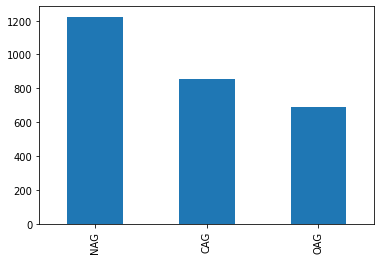

In [4]:
import numpy as np
#import fasttext
#from fasttext import FastVector
import pandas as pd
import keras  
from keras.layers import concatenate,merge,add
 
import re
from matplotlib import pyplot as plt
from sklearn.metrics import make_scorer, f1_score, accuracy_score, recall_score, precision_score, classification_report, precision_recall_fscore_support
from keras.layers import Reshape, Flatten, Dropout, Concatenate
from keras.layers import Input, Dense, Embedding, Conv2D, MaxPooling2D
from keras import regularizers
from keras.optimizers import Adam
from sklearn.feature_extraction.text import CountVectorizer
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.callbacks import ModelCheckpoint, EarlyStopping
from keras.models import Sequential
from keras.layers import Dense, Embedding, LSTM
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from keras.callbacks import ModelCheckpoint
import re
from keras import backend as K
from keras.models import Model
from keras.layers import Conv1D, MaxPooling1D, Dropout
from keras.layers import Input, Embedding, Activation, Flatten, Dense
from keras.layers.core import Dense, Dropout, Activation, Lambda
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from gensim.models.wrappers import FastText










import keras




df_train = pd.read_csv('/content/drive/MyDrive/trainv2.csv',header=0)
#df_dev = pd.read_csv('DataPre-Processing/dev.tsv',sep = '\t', header=0)
df_test = pd.read_csv('/content/drive/MyDrive/testv2.csv',header=0)





df_train.head




train_X = [str(x).lower() for x in df_train['text']]
#dev_X= [str(x).lower() for x in df_train['text']]
test_X = [str(x).lower()  for x in df_test['text']]




train_Y = [str(x) for x in df_train['tag']]
#ved_Y = [str(x) for x in df_ved['tag']]
test_Y = [str(x) for x in df_test['tag']]


# In[5]:

print('here 1')
df_train['tag'].value_counts().plot(kind='bar')
print(df_train['tag'].value_counts())





df_test['tag'].value_counts().plot(kind='bar')
print(df_test['tag'].value_counts())




num_words=35000          

tokenizer = Tokenizer(num_words=num_words,char_level=False, filters='!"#$%&()*+,-./:;<=>?@[\\]^_`{|}~\t\n',
                                   lower=False,split=' ')





tokenizer.fit_on_texts(train_X)

tokenizer.fit_on_texts(test_X)





word_index=tokenizer.word_index



X = tokenizer.texts_to_sequences(train_X)

test_X = tokenizer.texts_to_sequences(test_X)




print("here 2")
print(len(X))
print(len(test_X))





X=pad_sequences(X, maxlen= 50)                                     
test_X=pad_sequences(test_X, maxlen= 50)






print(test_X.shape)
test_X.shape




Y = pd.get_dummies(train_Y)

Y_test = pd.get_dummies(test_Y)




print(Y_test)

print(Y)






import gensim
import numpy
from gensim.models import Word2Vec
from gensim.utils import simple_preprocess

from gensim.models.keyedvectors import KeyedVectors

sg_w2v_model=KeyedVectors.load_word2vec_format('/content/drive/MyDrive/modelcbow.bin')





import fasttext


sg_w2v_modelC = fasttext.load_model('/content/drive/MyDrive/fasttextagg_unsuperv.bin')







len(word_index)



q=0
EMBEDDING_DIM=100
NUM_WORDS=34167
vocabulary_size=min(len(word_index)+1,NUM_WORDS)





# Fasttext
q=0
# embedding_matrix = np.zeros((vocabulary_size, EMBEDDING_DIM))
# for word, i in word_index.items():
#     if i>=NUM_WORDS:
#         continue
#     try:
#       if word in sg_w2v_model:
#         embedding_vector = sg_w2v_model[word]
#         embedding_matrix[i] = embedding_vector
#       else:
#         embedding_vector = sg_w2v_modelC[word]
#         embedding_matrix[i] = embedding_vector
#     except KeyError:
#         #embedding_matrix[i]=0
#         embedding_matrix[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)
#         q=q+1
    

# from keras.layers import Embedding
# embedding_layer = Embedding(vocabulary_size,
#                             EMBEDDING_DIM,
#                             weights=[embedding_matrix],
#                             trainable=False)

# embedding_matrix.shape


# In[25]:


# Word2vec....
r=0

embedding_matrix2 = np.zeros((vocabulary_size, EMBEDDING_DIM))
for word, i in word_index.items():
    if i>=NUM_WORDS:
        continue
    try:
        
        embedding_vector2 = sg_w2v_modelC[word]
        embedding_matrix2[i] = embedding_vector2
    except KeyError:
        embedding_matrix2[i]=np.random.normal(0,np.sqrt(0.25),EMBEDDING_DIM)
        r=r+1
print(r)        



filter_length = 3
nb_filter = 128
pool_length = 3
# LSTM


# In[28]:


from keras.layers import TimeDistributed,SpatialDropout1D
from keras.models import Sequential
from keras import optimizers
from keras.layers import LSTM, BatchNormalization, Bidirectional
embed_dim=100;
model_blstm = Sequential()
model_blstm.add(Embedding(vocabulary_size, embed_dim,
          weights=[embedding_matrix2], input_length=50, trainable=False))

model_blstm.add( SpatialDropout1D(0.2))

model_blstm.add(Bidirectional(LSTM(units=80)))
model_blstm.add(Dropout(0.2))

model_blstm.add((Dense(32, activation='softmax')))
model_blstm.add(Dropout(0.2))
model_blstm.add((Dense(3, activation='softmax')))

adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)
model_blstm.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model_blstm.summary()


# In[32]:


from tensorflow.keras.callbacks import EarlyStopping


    #Trains model for 50 epochs with shuffling after every epoch for training data and validates on validation data
print('Train...')
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history=model_blstm.fit(X, Y, batch_size=32, epochs=20,
         validation_split=0.2,callbacks=[early_stopping] )





score, acc = model_blstm.evaluate(test_X, Y_test, batch_size=32)
print('bilstm')
print(score, acc)




from keras.layers import Embedding,Dropout,SpatialDropout1D,GlobalMaxPool1D
from keras.layers import Dense, Input, Flatten
from keras.layers import Conv1D, MaxPooling1D, Embedding, Dropout, LSTM, GRU, Bidirectional
from keras import backend as K
from keras.engine.topology import Layer, InputSpec
from keras import initializers
from keras.optimizers import Adam
class AttLayer(Layer):
    def init(self, **kwargs):
        self.init = initializers.get('normal')
        super(AttLayer, self).init(**kwargs)
        
          

    def build(self,input_shape):
        print(input_shape)
        self.W=self.add_weight(name="att_weight",shape=(input_shape[-1],1),initializer="normal", trainable = True)
        self.b=self.add_weight(name="att_bias",shape=(120,),initializer="normal", trainable = True)    
        super(AttLayer, self).build(input_shape)

    def call(self, x, mask=None):
        print("call",x,self.W)
        eij = K.tanh(K.dot(x, self.W)+self.b)
       
        a = K.softmax(eij, axis=1)
        output = x*a
        c=(K.sum(output,axis=1))
        print("c shape",c[3])
        return (K.sum(output,axis=1))
    
    def compute_output_shape(self, input_shape):
        
            return input_shape[0], input_shape[-1]
        

        
embedding_layer = Embedding(len(word_index) + 1,
                            EMBEDDING_DIM,
                            weights=[embedding_matrix2],
                            input_length=50,
                            trainable=True)

sequence_input = Input(shape=(50,), dtype='int32')
embedded_sequences = embedding_layer(sequence_input)
embedded_sequences = SpatialDropout1D(0.2)(embedded_sequences)

lstm = Bidirectional(LSTM(60, return_sequences=True))(embedded_sequences)


l_att = AttLayer( )(lstm)
print(l_att.shape)


d = Dropout(0.2)(l_att)
x = Dense(32, activation='relu')(d)

x = Dropout(0.2)(x)

preds = Dense(3, activation='softmax')(x)

model = Model(sequence_input, preds)

#print((features))
adam =Adam(lr=0.0001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=1e-6)
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()


# In[55]:


print('Train...')
from tensorflow.keras.callbacks import EarlyStopping
early_stopping = EarlyStopping(monitor='val_loss', patience=2)
history=model.fit(X, Y, batch_size=32, epochs=6, validation_split=0.33,shuffle=True,callbacks=[early_stopping] )


# In[56]:


pred = model.predict(test_X, batch_size = 32, verbose = 1)
print(pred.shape)
score, acc = model.evaluate(test_X, Y_test, batch_size=32)
print('here')
print(score, acc)




#bilstm 
predict = model_blstm.predict(test_X)
test_y = Y_test.values

tmpMat = np.zeros((len(Y_test), 3), dtype=int)

for i in range(0,len(predict)):
    if(predict[i][0] > predict[i][1] and predict[i][0] > predict[i][2]):
        tmpMat[i][0]=1
    elif(predict[i][1] > predict[i][0] and predict[i][1] > predict[i][2]):
        tmpMat[i][1]=1
    else:
        tmpMat[i][2]=1
print(accuracy_score(test_y,tmpMat))
print(precision_score(test_y, tmpMat, average='macro'))
print(recall_score(test_y, tmpMat, average='macro'))
print('f1 bilstm')
print(f1_score(test_y, tmpMat, average='macro'))

print(len(tmpMat))



# Bilstm attention .
predict = model.predict(test_X)                 
test_y = Y_test.values

tmpMat = np.zeros((len(Y_test), 3), dtype=int)

for i in range(0,len(predict)):
    if(predict[i][0] > predict[i][1] and predict[i][0] > predict[i][2]):
        tmpMat[i][0]=1
    elif(predict[i][1] > predict[i][0] and predict[i][1] > predict[i][2]):
        tmpMat[i][1]=1
    else:
        tmpMat[i][2]=1
print(accuracy_score(test_y,tmpMat))
print(precision_score(test_y, tmpMat, average='weighted'))
print(recall_score(test_y, tmpMat, average='weighted'))
print('f1 bilstm attention')
print(f1_score(test_y, tmpMat, average='weighted'))






import matplotlib.pyplot as plt

history_dict = history.history




from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt



# Of class CAG
print('CAG')
print(accuracy_score(test_y[:,0],tmpMat[:,0]))
print(precision_score(test_y[:,0], tmpMat[:,0], average='weighted'))
print(recall_score(test_y[:,0], tmpMat[:,0], average='weighted'))
print(f1_score(test_y[:,0], tmpMat[:,0], average='weighted'))


# Of class NAG
print('NAG')
print(accuracy_score(test_y[:,1],tmpMat[:,1]))
print(precision_score(test_y[:,1], tmpMat[:,1], average='macro'))
print(recall_score(test_y[:,1], tmpMat[:,1], average='macro'))
print(f1_score(test_y[:,1], tmpMat[:,1], average='macro'))

# Of class OAG
print('OAG')
print(accuracy_score(test_y[:,2],tmpMat[:,2]))
print(precision_score(test_y[:,2], tmpMat[:,2], average='macro'))
print(recall_score(test_y[:,2], tmpMat[:,2], average='macro'))
print(f1_score(test_y[:,2], tmpMat[:,2], average='macro'))



In [6]:
import tensorflow as tf
wew=['bhot badhiya kaam kiya hai']
te = [str(x).lower()  for x in wew]

tokenizer.fit_on_texts(te)
tst = tokenizer.texts_to_sequences(te)
tst=pad_sequences(tst, maxlen= 50)
prdct=model.predict(tst) 
print('Comment:'+ wew[0])
if(prdct[0][0]>prdct[0][1] and prdct[0][0]>prdct[0][2]):
  print('This comment is Covertly Aggressive (CAG)')

if(prdct[0][1]>prdct[0][0] and prdct[0][1]>prdct[0][2]):
  print('This comment is Not Aggressive (NAG)')

if(prdct[0][2]>prdct[0][0] and prdct[0][2]>prdct[0][1]):
  print('This comment is Overtly Aggressive (OAG)')




Comment:bhot badhiya kaam kiya hai
This comment is Not Aggressive (NAG)


In [ ]:

import pandas as pd
import pandas as pd
df1=pd.read_csv('/content/drive/MyDrive/testv2.csv')
df_target=df1['tag']

tag=[]

for i in df_target:
  if(i=="NAG"):
    
    tag.append(0)
  elif(i=="CAG"):
    tag.append(1)
  else:
    tag.append(2)


df_target['num']=tag

print(tag)



[0, 2, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 2, 2, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 2, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 2, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 2, 1, 0, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 2, 0, 1, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 1, 0, 1, 2, 0, 0, 1, 2, 0, 1, 1, 1, 1, 1, 0, 2, 0, 0, 1, 0, 1, 0, 1, 2, 0, 1, 1, 0, 2, 1, 2, 0, 0, 0, 1, 1, 1, 1, 2, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 1, 1, 0, 2, 1, 0, 1, 0, 2, 2, 0, 0, 2, 1, 2, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 2, 0, 

In [ ]:
# workbook = load_workbook(filename="tpmt.xlsx")
# sheet=workbook.active
# l=[]

# for i in range (1,len(tmpMat)+1):
#   if(sheet.cell(row=i,column=1).value=='1'):
#     l.append('CAG')
#   if(sheet.cell(row=i,column=2).value=='1'):
#     l.append('NAG')

#   if(sheet.cell(row=i,column=3).value=='1'):
#     l.append('OAG')  
     
# wb1 = Workbook() 
# sheet2 = wb1.add_sheet('Sheet 1')

# for i in range(0,len(tmpMat)):
#     sheet2.write(i, 0,  l[i])
# wb1.save('predictedlables.xls')    

/usr/local/lib/python3.7/dist-packages/openpyxl/worksheet/header_footer.py:49: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


In [35]:
l=[]
for i in range(0,len(tmpMat)):
  if(tmpMat[i][0]==1):
    l.append('CAG')
  if(tmpMat[i][1]==1):
    l.append('NAG')
  if(tmpMat[i][2]==1):
    l.append('OAG')

print(l)


['NAG', 'CAG', 'NAG', 'CAG', 'NAG', 'CAG', 'NAG', 'CAG', 'CAG', 'NAG', 'NAG', 'CAG', 'CAG', 'OAG', 'CAG', 'CAG', 'CAG', 'CAG', 'NAG', 'NAG', 'CAG', 'CAG', 'CAG', 'CAG', 'CAG', 'CAG', 'NAG', 'CAG', 'CAG', 'OAG', 'CAG', 'CAG', 'CAG', 'CAG', 'OAG', 'CAG', 'OAG', 'CAG', 'NAG', 'CAG', 'CAG', 'CAG', 'CAG', 'CAG', 'NAG', 'CAG', 'CAG', 'NAG', 'CAG', 'CAG', 'CAG', 'CAG', 'NAG', 'CAG', 'CAG', 'CAG', 'OAG', 'NAG', 'NAG', 'CAG', 'NAG', 'CAG', 'CAG', 'NAG', 'CAG', 'NAG', 'NAG', 'NAG', 'NAG', 'CAG', 'CAG', 'NAG', 'CAG', 'NAG', 'CAG', 'NAG', 'NAG', 'NAG', 'NAG', 'NAG', 'NAG', 'NAG', 'CAG', 'CAG', 'CAG', 'NAG', 'CAG', 'NAG', 'NAG', 'CAG', 'NAG', 'CAG', 'NAG', 'NAG', 'CAG', 'NAG', 'CAG', 'CAG', 'NAG', 'NAG', 'NAG', 'NAG', 'CAG', 'CAG', 'NAG', 'NAG', 'OAG', 'NAG', 'NAG', 'CAG', 'NAG', 'CAG', 'CAG', 'NAG', 'CAG', 'CAG', 'NAG', 'NAG', 'NAG', 'CAG', 'CAG', 'CAG', 'CAG', 'CAG', 'CAG', 'NAG', 'OAG', 'CAG', 'CAG', 'OAG', 'CAG', 'CAG', 'CAG', 'CAG', 'CAG', 'NAG', 'OAG', 'CAG', 'CAG', 'OAG', 'CAG', 'OAG', 'CAG'

In [ ]:
#Ensemble


import pandas as pd
import csv

dfx=pd.DataFrame(l,columns=["predicted"])
# print(dfx['predicted'])
df_target=df_test['tag']
df_pred=dfx['predicted']
print(df_target)
print(df_pred)

tag=[]
pred=[]
for i in df_target:
  if(i=="NAG"):
    tag.append(0)
  elif(i=="CAG"):
    tag.append(1)
  else:
    tag.append(2)

for j in df_pred:
  if(j=="NAG"):
    k=[0,0]
    pred.append(k)
  elif(j=="CAG"):
    k=[1,0]
    pred.append(k)
  else:
    k=[2,0]
    pred.append(k)
print(pred)

print(tag)

    
    




In [40]:
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier

clf1=LogisticRegression()
clf2 = RandomForestClassifier(n_estimators=50, random_state=1)
clf3 = GaussianNB()

ensemble = VotingClassifier(estimators=[
        ('lr',clf1),('rf', clf2), ('gnb', clf3)], voting='soft')

In [41]:
from sklearn.model_selection import cross_val_score
from numpy import mean
clf2.fit(pred,tag)
clf3.fit(pred,tag)
ensemble.fit(pred,tag)
scores = cross_val_score(ensemble, pred, tag, scoring='accuracy',error_score='raise')
print(mean(scores))

0.6690751746428945
